#### What is regression problem?
* House Price Prediction
* How much or How many
* Predict where the boxes should be in object detection problem
* Predict a number
 

In [20]:
import pandas as pd
import tensorflow as tf
tf.__version__

'2.3.0'

### Creating data to view and fit

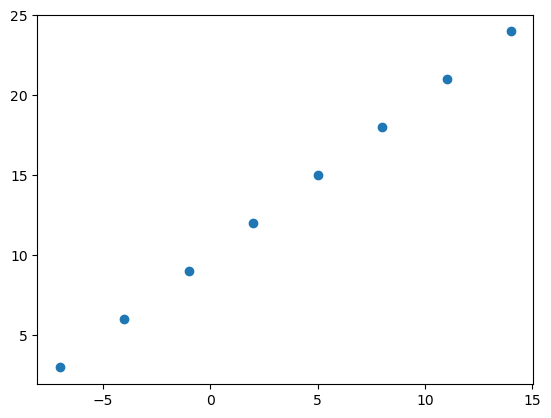

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = tf.constant(np.arange(-7.0,15.0,3.0),dtype=tf.float32)
y = tf.constant(np.arange(3.0,25.0,3.0),dtype=tf.float32)

# Visualize
plt.scatter(X,y)

In [22]:
y == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Input and output shapes

In [23]:
house_info = tf.constant(['Bedroom', 'bathroom', "Car"])
house_price = tf.constant([939799])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939799], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'bathroom', b'Car'], dtype=object)>)

In [24]:
input_shape, output_shape = X[0].shape, y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [25]:
X[0].ndim, y[0].ndim

(0, 0)

### Steps in modelling with Tensorflow
1. Get the data ready (Turn into tensors).
2. Build or pick a pretrained Model.(to suit your problem)
3. Fit the model to the data and make predictions.
4. Evaluate the model
5. Improve throught experimentation
6. Save and reload your trained model

#### Can be written as also:
1. Creating a model - define the input and output layers, as well as the hidden </br>
layers of a deep learning model. </br>
2. Compiling a model - define the loss function(a function that tells our model how wrong it is) </br>
and optimizer (tells how our model how to improve the patterns its learning) and evaluation metrics </br>
(what we can use to interpret the performance of our model). </br>
3. Fitting a model -  letting the model try to find patterns between X & y (features and labels) 

- Construct a model by setting the random seed and using tf.keras.Sequential </br>
- You can directly assign layers as a list in Sequential.
`model = tf.keras.Sequential([tf.keras.layers.Dense(1])` 
- Or, model is initialized with Sequential </br>
`model = tf.keras.Sequential()`
- The first layer can have an `input_shape` argument
`model.add(tf.keras.layers.Dense(8, input_shape=(16)))`
- Then, it has automatic shape reference
`model.add(tf.keras.layers.Dense(4))
- Or seperately assign input shape then add the first layer
`model = tf.keras.Sequential()`
`model.add(tf.keras.Input(shape=(16)))`
`model.add(tf.keras.Dense(8))`       

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is Stochastic Gradient Descent
               metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 700us/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 766us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 653us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 867us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 528us/step - loss: 10.9748 - mae: 10.9748


In [27]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [28]:
# make prediction with our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improve our model
1. **Creating a model** - Add more layers, increase the number of 
hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Change the optimization fucntion or perhaps the ** learning rate ** of the optimization function.
3. ** Fitting a model** - Fit the model for more ** epochs**(leave it training for longer) or on more data (give the model more examples to learn from)

## Common ways to improve our model
* Adding layers
* Increase the number of hidden units(neurons)
* Change the activation Function
* Change the optimization function
* Change Learning rate **very important**
* Fitting on more data
* Fitting for longer

In [29]:
# Let's rebuild the model and change epoch to 100
# Create the model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.mae,metrics="mae")
# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 858us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 99

In [30]:
# Predict from a model
model.predict([17.0]) # Should be 27

array([[30.158512]], dtype=float32)

In [31]:
# Let's rebuild our model and change optimizer
# With Adam it shows bad result so switching back to SGD
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compiler our model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mae, metrics="mae")
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

# Predict X=17.0 on the model
model.predict([17.0])

Epoch 1/100


1/1 [==============================] - 0s 2ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 864us/step - loss: 11.2174 - mae: 11.2174
Epoch 3/100
1/1 [==============================] - 0s 868us/step - loss: 11.2129 - mae: 11.2129
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.2084 - mae: 11.2084
Epoch 5/100
1/1 [==============================] - 0s 938us/step - loss: 11.2039 - mae: 11.2039
Epoch 6/100
1/1 [==============================] - 0s 991us/step - loss: 11.1994 - mae: 11.1994
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1949 - mae: 11.1949
Epoch 8/100
1/1 [==============================] - 0s 753us/step - loss: 11.1904 - mae: 11.1904
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1859 - mae: 11.1859
Epoch 10/100
1/1 [==============================] - 0s 699us/step - loss: 11.1814 - mae: 11.1814
Epoch 11/100
1/1 [==============================] - 0s 669u

array([[12.8648405]], dtype=float32)

In [32]:
# With SGD it has best result on learning rate 0.1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=tf.keras.losses.mae,metrics="mae")
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
model.predict([17.0])

Epoch 1/100


1/1 [==============================] - 0s 1ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 611us/step - loss: 9.2486 - mae: 9.2486
Epoch 3/100
1/1 [==============================] - 0s 757us/step - loss: 7.9236 - mae: 7.9236
Epoch 4/100
1/1 [==============================] - 0s 828us/step - loss: 7.2868 - mae: 7.2868
Epoch 5/100
1/1 [==============================] - 0s 955us/step - loss: 7.5111 - mae: 7.5111
Epoch 6/100
1/1 [==============================] - 0s 932us/step - loss: 7.4181 - mae: 7.4181
Epoch 7/100
1/1 [==============================] - 0s 640us/step - loss: 7.1250 - mae: 7.1250
Epoch 8/100
1/1 [==============================] - 0s 887us/step - loss: 7.0687 - mae: 7.0687
Epoch 9/100
1/1 [==============================] - 0s 919us/step - loss: 7.0125 - mae: 7.0125
Epoch 10/100
1/1 [==============================] - 0s 786us/step - loss: 6.9562 - mae: 6.9562
Epoch 11/100
1/1 [==============================] - 0s 854us/step - los

array([[30.489098]], dtype=float32)

In [33]:
# Adding a new layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.mae,metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)
model.predict([17.0])

Epoch 1/100


1/1 [==============================] - 0s 1ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 729us/step - loss: 8.6650 - mae: 8.6650
Epoch 3/100
1/1 [==============================] - 0s 754us/step - loss: 4.4291 - mae: 4.4291
Epoch 4/100
1/1 [==============================] - 0s 701us/step - loss: 7.7999 - mae: 7.7999
Epoch 5/100
1/1 [==============================] - 0s 825us/step - loss: 4.7036 - mae: 4.7036
Epoch 6/100
1/1 [==============================] - 0s 721us/step - loss: 7.3381 - mae: 7.3381
Epoch 7/100
1/1 [==============================] - 0s 726us/step - loss: 4.9201 - mae: 4.9201
Epoch 8/100
1/1 [==============================] - 0s 773us/step - loss: 7.0281 - mae: 7.0281
Epoch 9/100
1/1 [==============================] - 0s 730us/step - loss: 5.1433 - mae: 5.1433
Epoch 10/100
1/1 [==============================] - 0s 634us/step - loss: 6.7336 - mae: 6.7336
Epoch 11/100
1/1 [==============================] - 0s 930us/step - los

array([[15.71494]], dtype=float32)

In [34]:
# Adding one more layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.mae,metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
model.predict([17.0])

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 14.0361 - mae: 14.0361
Epoch 2/100
1/1 [==============================] - 0s 889us/step - loss: 7.1131 - mae: 7.1131
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 14.4632 - mae: 14.4632
Epoch 4/100
1/1 [==============================] - 0s 729us/step - loss: 12.6788 - mae: 12.6788
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 12.0261 - mae: 12.0261
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1502 - mae: 11.1502
Epoch 7/100
1/1 [==============================] - 0s 670us/step - loss: 8.8829 - mae: 8.8829
Epoch 8/100
1/1 [==============================] - 0s 888us/step - loss: 4.3319 - mae: 4.3319
Epoch 9/100
1/1 [==============================] - 0s 908us/step - loss: 10.3287 - mae: 10.3287
Epoch 10/100
1/1 [==============================] - 0s 973us/step - loss: 6.7356 - mae: 6.7356
Epoch 11/100
1/1 [==============================] - 0s 

array([[17.606993]], dtype=float32)

In [35]:
# Adding one more layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.mae,metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
model.predict([17.0])

Epoch 1/100


1/1 [==============================] - 0s 1ms/step - loss: 13.1532 - mae: 13.1532
Epoch 2/100
1/1 [==============================] - 0s 721us/step - loss: 7.4410 - mae: 7.4410
Epoch 3/100
1/1 [==============================] - 0s 951us/step - loss: 29.9016 - mae: 29.9016
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 13.5048 - mae: 13.5048
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 12.9780 - mae: 12.9780
Epoch 6/100
1/1 [==============================] - 0s 844us/step - loss: 12.4671 - mae: 12.4671
Epoch 7/100
1/1 [==============================] - 0s 862us/step - loss: 11.5964 - mae: 11.5964
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 9.9753 - mae: 9.9753
Epoch 9/100
1/1 [==============================] - 0s 625us/step - loss: 4.0371 - mae: 4.0371
Epoch 10/100
1/1 [==============================] - 0s 831us/step - loss: 52.2599 - mae: 52.2599
Epoch 11/100
1/1 [==============================] - 0s 729us/step

array([[18.212301]], dtype=float32)

In [36]:
# Sir's method

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=['mae'],metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
model.predict([17.0])

Epoch 1/100


1/1 [==============================] - 0s 964us/step - loss: 13.9408 - mae: 13.9408
Epoch 2/100
1/1 [==============================] - 0s 870us/step - loss: 12.9697 - mae: 12.9697
Epoch 3/100
1/1 [==============================] - 0s 620us/step - loss: 11.9981 - mae: 11.9981
Epoch 4/100
1/1 [==============================] - 0s 955us/step - loss: 11.0177 - mae: 11.0177
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.0220 - mae: 10.0220
Epoch 6/100
1/1 [==============================] - 0s 758us/step - loss: 9.0050 - mae: 9.0050
Epoch 7/100
1/1 [==============================] - 0s 955us/step - loss: 7.9612 - mae: 7.9612
Epoch 8/100
1/1 [==============================] - 0s 695us/step - loss: 6.8847 - mae: 6.8847
Epoch 9/100
1/1 [==============================] - 0s 976us/step - loss: 6.8668 - mae: 6.8668
Epoch 10/100
1/1 [==============================] - 0s 628us/step - loss: 7.3183 - mae: 7.3183
Epoch 11/100
1/1 [==============================] - 0s 1ms/step

array([[27.524397]], dtype=float32)

## Evaluating a Model
It's Good idea to visualize:
* the data what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learn?
* The prediction of th model - how do the predicitons of a model line up against the ground truth ( the original labels)

In [37]:
# Make a big dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [38]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

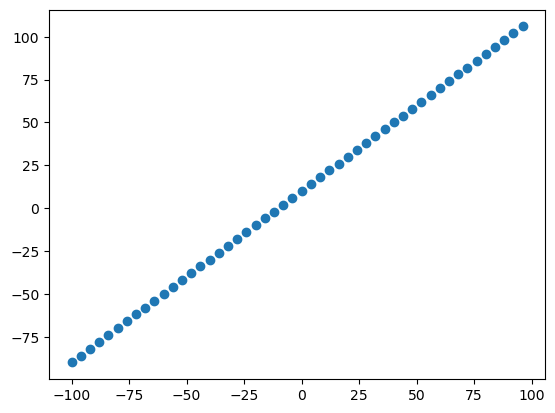

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### Three 3 Sets...
* Train Set -> The model is trained on this data (70-80%)
* Validation Set -> The Model is tweaked on this data, this is 10-15%
* Test Set -> The model is evaluated on what it has learnt this is 10-15%

In [40]:
# We can use scikit-learn to do that this does not work
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [41]:
# Check the length of how many samples we have
len(X)

50

In [42]:
X_train,y_train = X[:40],y[:40] 
X_test,y_test = X[40:],y[40:]
len(X_train), len(X_test)

(40, 10)

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data in train and test splits


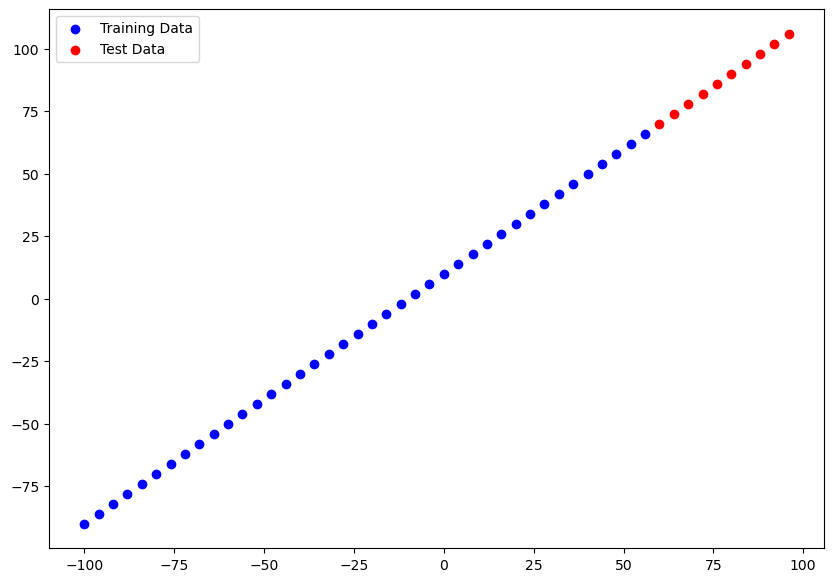

In [44]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label='Training Data')
# Plot test data in red
plt.scatter(X_test,y_test,c='r',label='Test Data')
# Show a legend to understand
plt.legend();

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,metrics=['mae'])
# model.fit(X_train,y_train,epochs=100)

# Visualize the model


In [46]:
# Gives an error because no input shape
# model.summary()

In [47]:
# What does one unit of our data look like if its a scalar then input shape will be one
X[0]
# As it is a scalar hence we can say that its input shape will be one

<tf.Tensor: shape=(), dtype=int32, numpy=-100>

In [48]:
# Lets create a model a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,metrics=['mae'])


In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the prameters (patterns) the model can update as it trains.
* Non-trainable params - these are not updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [50]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [51]:
y_preds = model.predict(X_test)

In [52]:
# from tensorflow.keras.utils import  plot_model
# plot_model(model,show_shapes=True)

# Visualizing model predictions
* A good method is to plot them against the ground truth labels.
* y_preds vs y_true

In [53]:
y_preds = model.predict(X_test)
y_preds, y_test

(array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [54]:
# Let's create  a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_label=y_test, predictions=y_preds):
    """
    Plots training data, testing data and compares predictions with ground truth labels.
    """
    plt.figure(figsize=(10,7))
    # Plotting training set
    plt.scatter(train_data,train_labels,c='b', label='Training')
    # PLotting the test
    plt.scatter(test_data,test_label,c='r', label="Test")
    # Comparing the predictions
    plt.scatter(test_data,predictions,c='g',label="Predictions")
    plt.legend();

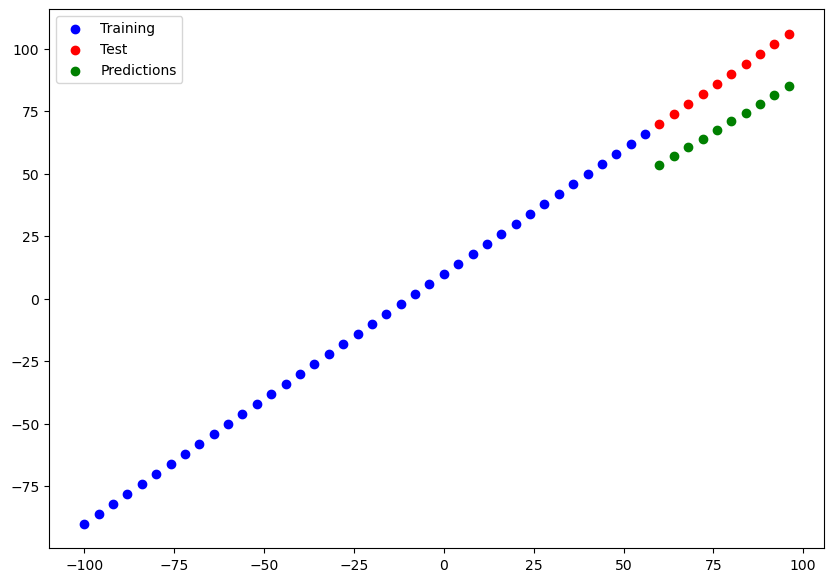

In [55]:
plot_predictions()

## Evaluate our model with regression evaluation metrics
There are mainly two in regression are:-
1. MAE-> MeanAbsoluteError -> "on avg how wrong is each of my model's predictions"
2. MSE -> MeanSquaredError -> "Square the avg errors

In [56]:
tf.keras.losses.MAE(y_test,y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [57]:
tf.keras.losses.MSE(y_test,y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1317.3499 , 1089.5106 ,  885.9652 ,  706.71387,  551.7559 ,
        421.0921 ,  314.72183,  232.64555,  174.86307,  141.37428],
      dtype=float32)>

In [58]:
y_pred = tf.constant(y_preds)

In [59]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>

In [60]:
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [61]:
tf.keras.losses.MSE(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

### Since output y_pred was a nd.array we needed to convert it into tensor
### then we got a shape difference so we squeezed it and finally got our MAE and MSE 

In [62]:
# Making some functions to reuse MAE and MSE
def my_mae(y_true,y_pred=tf.squeeze(y_pred)):
    return tf.metrics.mae(y_true=y_test,y_pred=tf.squeeze(y_pred))
def my_mse(y_true,y_pred):
    return tf.metrics.MSE(y_true=y_test,y_pred=tf.squeeze(y_pred))

In [63]:
# Data->Model->Train->Predictions
# Build fit evaluate tweak fit evaluate tweak fit evaluate ***

### How to Improve a model?
1. Get more data
2. Make model larger -> Add layers or hidden unit
3. Train for longer

Let's do 3 modelling experiments:
1.`Model 1` -> Change epochs to 100
2. `Model 2` -> Add one layer
3. `Model 3` -> Change epoch to 500


In [64]:
# Creating model 1
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.mae,metrics=['mae'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 745us/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 959us/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 798us/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 825us/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 835us/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 706us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 818us/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 780us/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] -

Epoch 32/100
2/2 [==============================] - 0s 813us/step - loss: 7.6215 - mae: 7.6215
Epoch 33/100
2/2 [==============================] - 0s 1ms/step - loss: 9.3221 - mae: 9.3221
Epoch 34/100
2/2 [==============================] - 0s 836us/step - loss: 13.7313 - mae: 13.7313
Epoch 35/100
2/2 [==============================] - 0s 905us/step - loss: 11.1276 - mae: 11.1276
Epoch 36/100
2/2 [==============================] - 0s 1ms/step - loss: 13.3222 - mae: 13.3222
Epoch 37/100
2/2 [==============================] - 0s 952us/step - loss: 9.4763 - mae: 9.4763
Epoch 38/100
2/2 [==============================] - 0s 802us/step - loss: 10.1381 - mae: 10.1381
Epoch 39/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1793 - mae: 10.1793
Epoch 40/100
2/2 [==============================] - 0s 906us/step - loss: 10.9137 - mae: 10.9137
Epoch 41/100
2/2 [==============================] - 0s 678us/step - loss: 7.9063 - mae: 7.9063
Epoch 42/100
2/2 [==========================

In [65]:
y_pred_1 = model.predict(X_test)

In [66]:
# my_mae(y_true=y_test,y_pred=y_pred),my_mse(y_true=y_test,y_pred=y_pred)
# mae_1 = my_mae(y_pred=tf.squeeze(y_pred_1))
# mse_1 = my_mse(y_pred=tf.squeeze(y_pred_1))
mae_1 = tf.metrics.mae(y_true=y_test,y_pred=tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mse(y_true=y_test,y_pred=tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [67]:
y_pred_1,y_test

(array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

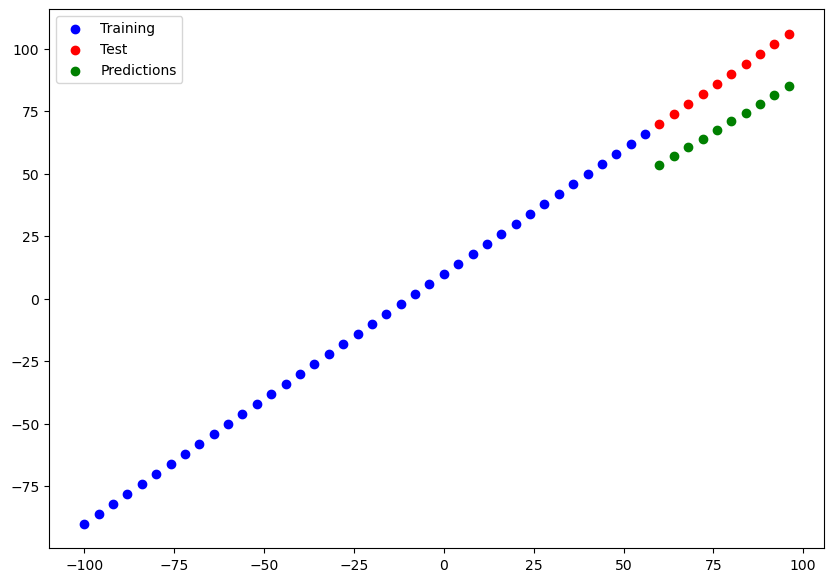

In [68]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_1)

In [69]:
# Building model 2 adding a new layer
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,metrics=['mae'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 941us/step - loss: 37.5163 - mae: 37.5163
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 15.3674 - mae: 15.3674
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 11.0486 - mae: 11.0486
Epoch 4/100
2/2 [==============================] - 0s 920us/step - loss: 8.4438 - mae: 8.4438
Epoch 5/100
2/2 [==============================] - 0s 934us/step - loss: 9.1493 - mae: 9.1493
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.1722 - mae: 9.1722
Epoch 7/100
2/2 [==============================] - 0s 753us/step - loss: 10.8420 - mae: 10.8420
Epoch 8/100
2/2 [==============================] - 0s 797us/step - loss: 14.4265 - mae: 14.4265
Epoch 9/100
2/2 [==============================] - 0s 729us/step - loss: 22.3205 - mae: 22.3205
Epoch 10/100
2/2 [==============================] - 0s 560us/step - loss: 11.4851 - mae: 11.4851
Epoch 11/100
2/2 [==============================] -

In [70]:
y_pred_2 = model.predict(X_test)

In [71]:
# my_mae(),my_mse()
mae_2,mse_2 = tf.metrics.mae(y_test,tf.squeeze(y_pred_2)), tf.metrics.mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.5793471>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.517349>)

In [72]:
y_pred_2,y_test

(array([[ 65.104515],
        [ 69.39702 ],
        [ 73.68952 ],
        [ 77.982025],
        [ 82.27452 ],
        [ 86.56694 ],
        [ 90.85937 ],
        [ 95.15178 ],
        [ 99.444214],
        [103.736626]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

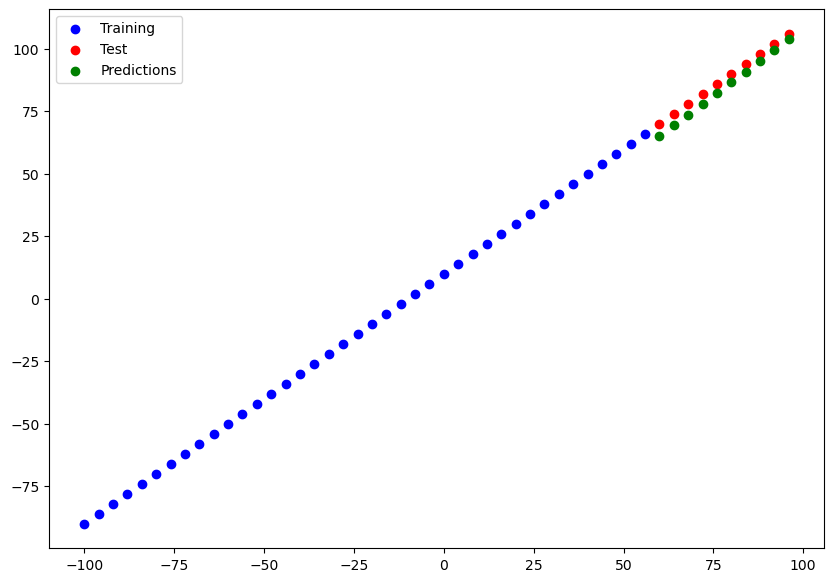

In [73]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_2)

In [74]:
# Lets build model 3
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(1,)
    ])
model_3.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,metrics=['mae'])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 37.5163 - mae: 37.5163
Epoch 2/500
2/2 [==============================] - 0s 933us/step - loss: 15.3674 - mae: 15.3674
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 11.0486 - mae: 11.0486
Epoch 4/500
2/2 [==============================] - 0s 779us/step - loss: 8.4438 - mae: 8.4438
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 9.1493 - mae: 9.1493
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 9.1722 - mae: 9.1722
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 10.8420 - mae: 10.8420
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 14.4265 - mae: 14.4265
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 22.3205 - mae: 22.3205
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 11.4851 - mae: 11.4851
Epoch 11/500
2/2 [==============================] - 0s 1ms/st

In [75]:
y_pred_3 = model_3.predict(X_test)

In [76]:
mae_3,mse_3 = tf.metrics.mae(y_test,tf.squeeze(y_pred_3)),tf.metrics.mse(y_test,tf.squeeze(y_pred_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.809256>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.772269>)

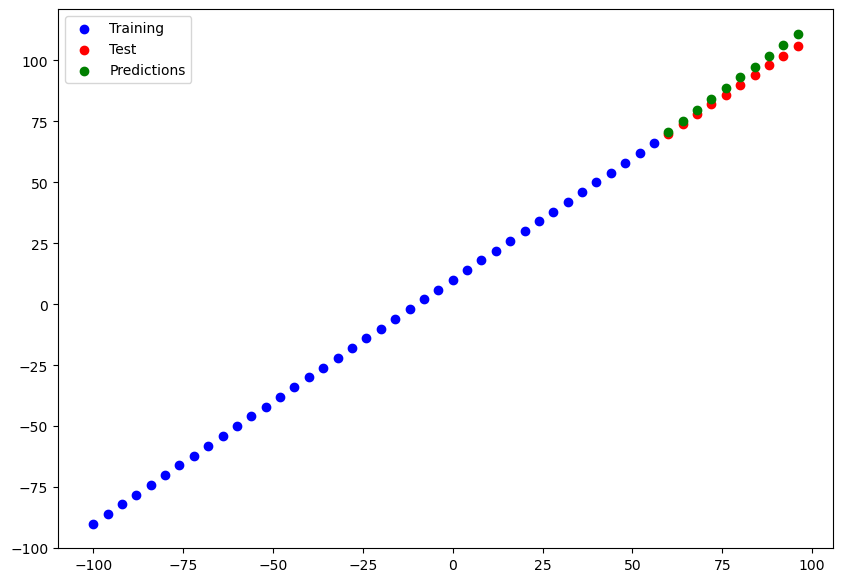

In [77]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_3)

In [78]:
y_test,y_pred_3

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 70.66081 ],
        [ 75.138275],
        [ 79.61574 ],
        [ 84.0932  ],
        [ 88.57065 ],
        [ 93.04802 ],
        [ 97.5254  ],
        [102.00278 ],
        [106.48016 ],
        [110.95753 ]], dtype=float32))

## Comaparing results of our experiments

In [79]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]
all_resutls = pd.DataFrame(data=model_results,columns=["Model","mae","mse"])
all_resutls

,Model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.579347,13.517349
2,model_3,2.809256,9.772269


In [80]:
# model_3.summary

## Tracking your experiments
* Tensorboard -> help track modelling experiments
* Weights and Biases -> tool for tracking all kinds of machine learning experiments(plugs directly into tensorboard)
    

## Saving our Model
Saving our model helps to use them outside Colab such as in webapp or mobile app
There are two ways to save our model
1. SavedModel Format
2. HDF5 format

In [81]:
# saving model using saved model format
model_3.save("NN_regression_best_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2023-08-20 23:51:29.857631: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: NN_regression_best_model/assets


In [82]:
# Saving model using HDF5 format
model_3.save("NN_regression_HDF5.h5")

# Loading our saved model

In [83]:
# Loading saved model format
loaded_SavedModel_format = tf.keras.models.load_model("NN_regression_best_model")
loaded_SavedModel_format.summary(), model_3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


(None, None)

In [84]:
model_3_preds, loaded_SavedModel_format_preds = model_3.predict(X_test),loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [85]:
tf.metrics.mae(y_test,tf.squeeze(model_3_preds)), tf.metrics.mae(y_test,tf.squeeze(loaded_SavedModel_format_preds))

(<tf.Tensor: shape=(), dtype=float32, numpy=2.809256>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.809256>)

In [86]:
# Since the values are similar hence it was sucessfully

In [87]:
# loading as h5
load_h5_model3 = tf.keras.models.load_model("NN_regression_HDF5.h5")
y_h5_preds = load_h5_model3.predict(X_test)
y_h5_preds == model_3_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [88]:
# MAE comparison
(mae_3 == my_mae(y_test,y_h5_preds)).numpy()

True

## A larger Example

In [89]:
# Importing required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# Read the csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
# Lets one hot encode our data frame
insurance_onehot = pd.get_dummies(insurance,dtype=int)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [93]:
# Create X and y
X = insurance_onehot.drop('charges',axis=1)
y = insurance_onehot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [94]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [95]:
# Splitting out data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
len(X_train), len(X_test)

(1070, 268)

In [116]:
# Creating our neural network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mae,metrics=['mae'])
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


34/34 [==============================] - 0s 831us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 810us/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 885us/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 830us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 870us/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 681us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 834us/step - loss: 7409.0811 - ma

In [119]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 986us/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [98]:
y_pred_1 = insurance_model.predict(X_test)
insurance_ypred = tf.squeeze(y_pred_1)

In [99]:
tf.keras.metrics.mae(y_test,insurance_ypred)

<tf.Tensor: shape=(), dtype=float32, numpy=8032.4385>

In [134]:
# Improving our model
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
ins_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,),
    tf.keras.layers.Dense(1)
])
ins_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.mae,metrics=['mae'])
history = ins_model2.fit(X_train,y_train,epochs=5000)

Epoch 1/5000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


34/34 [==============================] - 0s 1ms/step - loss: 9692.4111 - mae: 9692.4111
Epoch 2/5000
34/34 [==============================] - 0s 1ms/step - loss: 7325.5039 - mae: 7325.5039
Epoch 3/5000
34/34 [==============================] - 0s 1ms/step - loss: 6907.9346 - mae: 6907.9346
Epoch 4/5000
34/34 [==============================] - 0s 1ms/step - loss: 6479.1987 - mae: 6479.1987
Epoch 5/5000
34/34 [==============================] - 0s 1ms/step - loss: 6313.1948 - mae: 6313.1948
Epoch 6/5000
34/34 [==============================] - 0s 1ms/step - loss: 6011.6357 - mae: 6011.6357
Epoch 7/5000
34/34 [==============================] - 0s 731us/step - loss: 5518.0542 - mae: 5518.0542
Epoch 8/5000
34/34 [==============================] - 0s 775us/step - loss: 4688.0015 - mae: 4688.0015
Epoch 9/5000
34/34 [==============================] - 0s 930us/step - loss: 3912.5449 - mae: 3912.5449
Epoch 10/5000
34/34 [==============================] - 0s 821us/step - loss: 3946.1177 - mae: 3946

In [7]:
ins_model2.evaluate(X_test,y_test)

NameError: name 'ins_model2' is not defined

Text(0.5, 0, 'epochs')

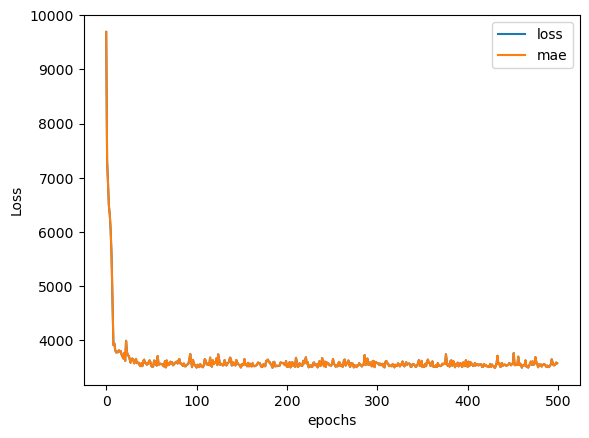

In [133]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('epochs')

# Preprocessing data (normalization and standardization)
# Scale Features(NN tend to prefer normalize)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# To prepare we need to use scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Create a column transformer
# We do not scale our target variable but we do scale our feature variable
# age bmi and children are numbers so they need to be normalised
# sex smoker and region need to be onehotencoded like previous because they are strings
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex',"smoker",'region'])
)
# Create X and y 
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the Column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [4]:
# What does our data look like?
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [5]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [11]:
# Let's build a NN
tf.random.set_seed(42)
ins_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
ins_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.mae,metrics=['mae'])
history = ins_model3.fit(X_train_normal,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 880us/step - loss: 12637.2021 - mae: 12637.2021
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 8120.7441 - mae: 8120.7441
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 7099.0166 - mae: 7099.0166
Epoch 4/500
34/34 [==============================] - 0s 831us/step - loss: 5560.9077 - mae: 5560.9077
Epoch 5/500
34/34 [==============================] - 0s 812us/step - loss: 3890.3486 - mae: 3890.3486
Epoch 6/500
34/34 [==============================] - 0s 838us/step - loss: 3656.1345 - mae: 3656.1345
Epoch 7/500
34/34 [==============================] - 0s 719us/step - loss: 3625.7571 - mae: 3625.7571
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 3625.8984 - mae: 3625.8984
Epoch 9/500
34/34 [==============================] - 0s 744us/step - loss: 3570.4048 - mae: 3570.4048
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 3551.8511 - 

In [15]:
ins_model3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 815us/step - loss: 3177.3333 - mae: 3177.3333


[3177.333251953125, 3177.333251953125]

Text(0.5, 0, 'epochs')

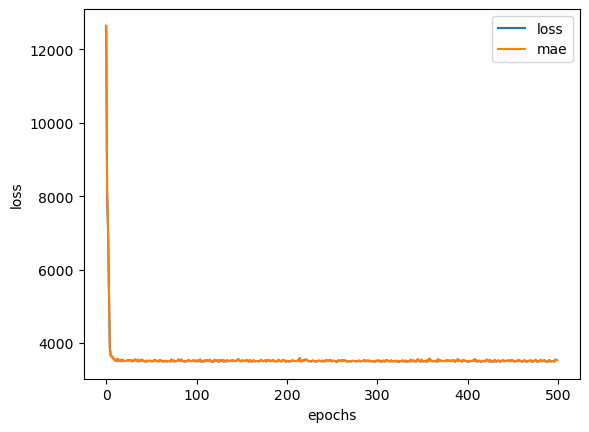

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")